<a href="https://colab.research.google.com/github/saisanthoshbussa/StockPrice-Prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stock Price Prediction using LSTM**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [2]:
!pip install tensorflow

In [3]:

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

# Reading csv file

In [5]:
df=pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


# Converting date to datetime

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.index=df['Date']
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


# Analyzing the Closing prices from dataframe

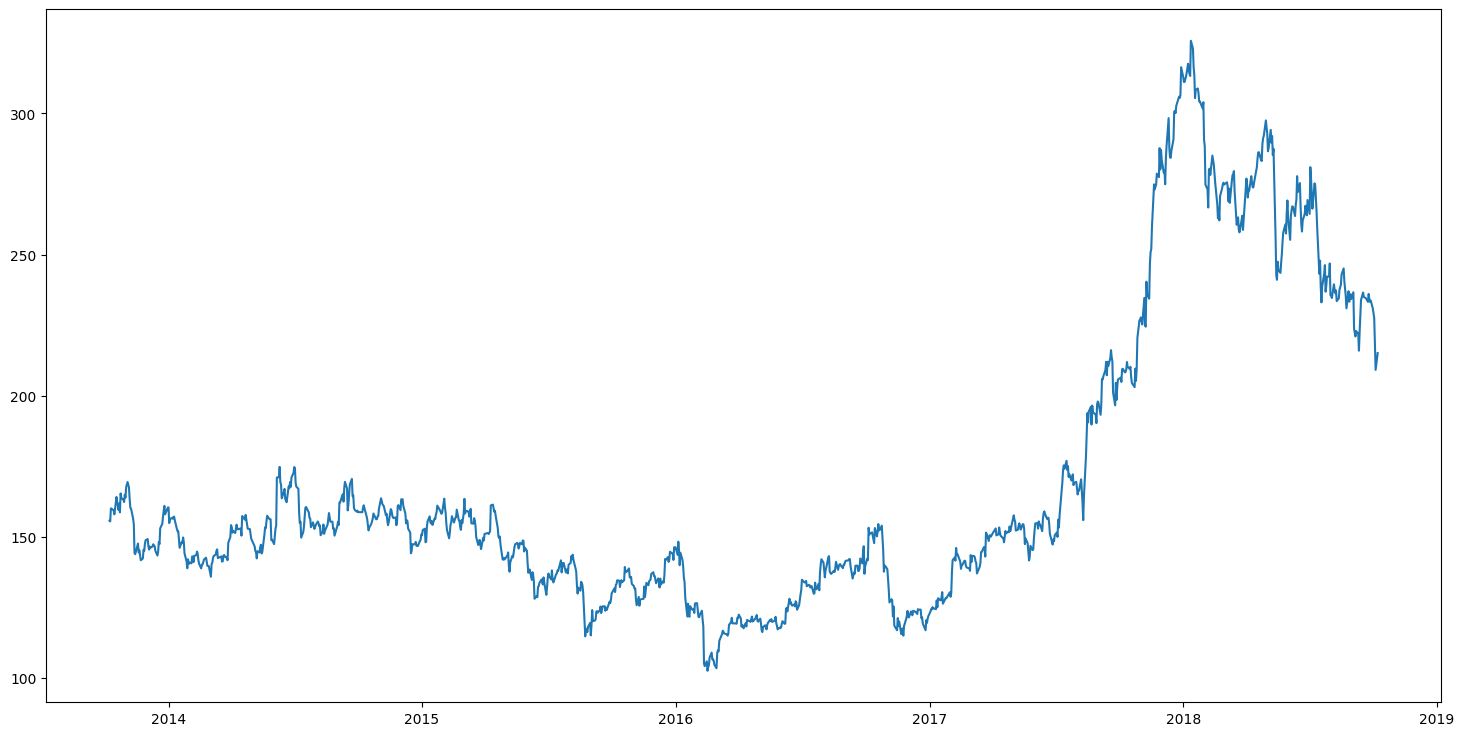

In [8]:
plt.figure(figsize=(18,9))
plt.plot(df['Close'],label='The Closing Prices')

# Sorting the dataset

In [9]:
sorted_df=df.sort_index(ascending=True,axis=0)
new_df=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
sorted_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


# Filtering Date and Close columns

In [10]:
for i in range(len(df)):
  new_df['Date'][i]=sorted_df['Date'][i]
  new_df['Close'][i]=sorted_df['Close'][i]
new_df.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [11]:
final_df=new_df.values
print(final_df)

[[Timestamp('2013-10-08 00:00:00') 155.8]
 [Timestamp('2013-10-09 00:00:00') 155.55]
 [Timestamp('2013-10-10 00:00:00') 160.15]
 ...
 [Timestamp('2018-10-04 00:00:00') 218.2]
 [Timestamp('2018-10-05 00:00:00') 209.2]
 [Timestamp('2018-10-08 00:00:00') 215.15]]


In [12]:
len(final_df)

1235

# Normalize the new filtered dataset:

In [13]:
train_data=final_df[0:980,:]
val_data=final_df[980:,:]

new_df.index=new_df['Date']
new_df.drop('Date',axis=1,inplace=True)
new_df

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_df.values)
scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

# Deriving X_train & Y_train

In [15]:
X_train=[]
Y_train=[]
for i in range(60,len(train_data)):
  X_train.append(scaled_data[i-60:i,0])
  Y_train.append(scaled_data[i,0])

In [16]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [17]:
X_train.shape

(920, 60, 1)

# Build and train the LSTM model:

In [18]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [19]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [20]:
input=new_df[len(new_df)-len(val_data)-60:].values
input=input.reshape(-1,1)
input=scaler.transform(input)

In [21]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train,Y_train,epochs=1,batch_size=1,verbose=2)

920/920 - 30s - loss: 0.0010 - 30s/epoch - 33ms/step


# Test dataset

In [22]:
X_test=[]
for i in range(60,input.shape[0]):
  X_test.append(input[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Predicting Stock Price using LSTM model

In [23]:
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 [==============================] - 2s 49ms/step


# Save the Model

In [24]:
lstm_model.save('stock_price_pred.h5')

# Visualize the predicted stock costs with actual stock costs:

<ipython-input-26-71bb135d7677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions']=predicted_closing_price


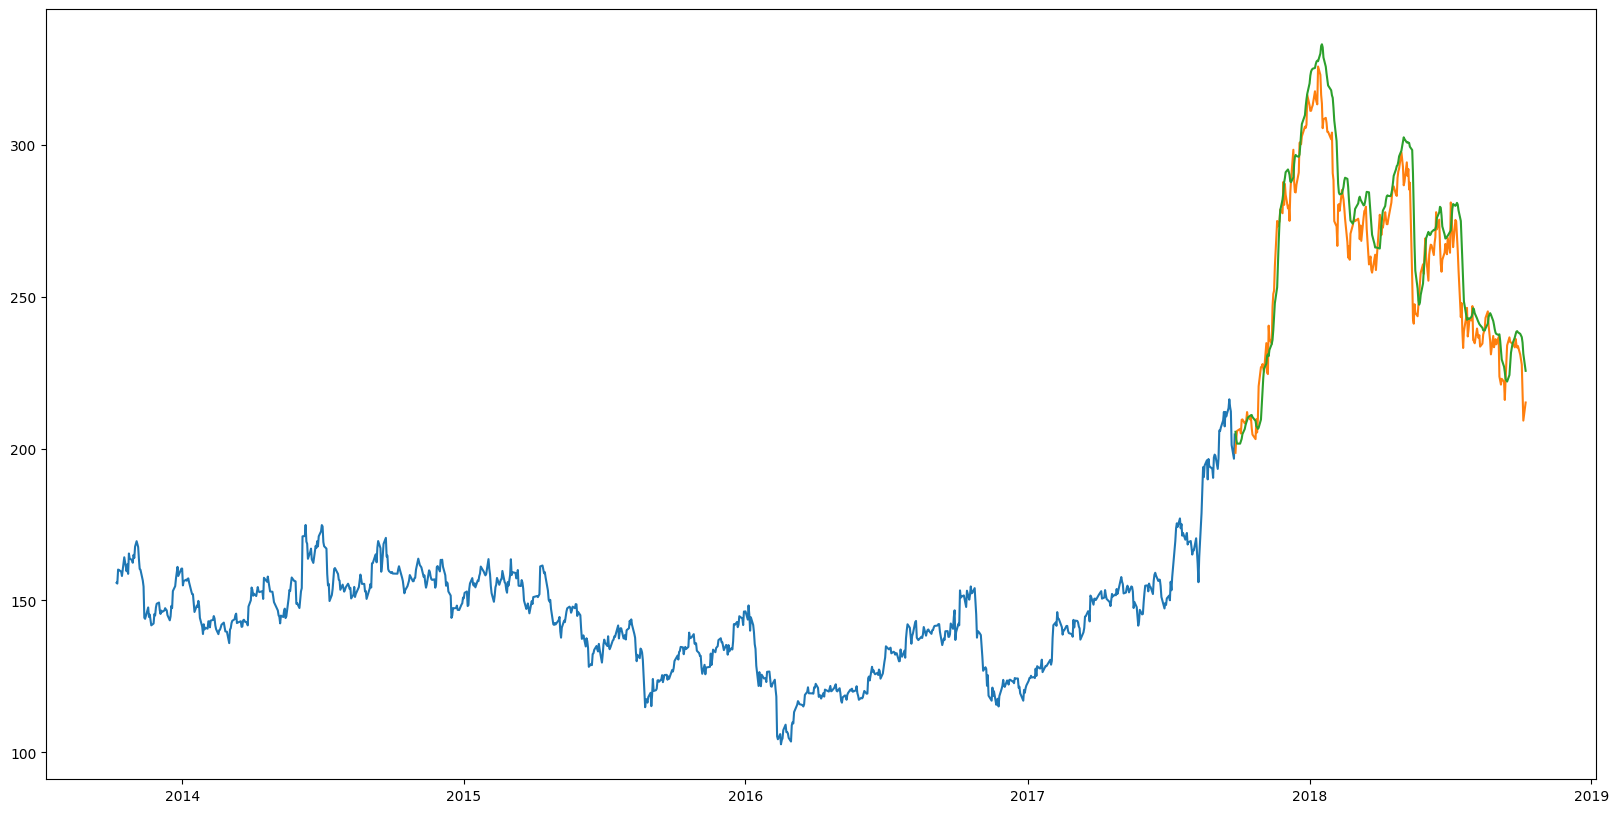

In [26]:
train=new_df[:980]
val=new_df[980:]
val['Predictions']=predicted_closing_price

plt.plot(train['Close'])
plt.plot(val[['Close','Predictions']])


In [27]:
#from sklearn.metrics import accuracy_score;
#test_data_accuracy = accuracy_score(np.array(val["Close"].values),np.array(predicted_closing_price[:,0]),normalize=False);
#print('Accuracy : ',test_data_accuracy);
#predicted_closing_price[:,0]


# **Building the Dashboard using Ploty Dash**

# Installing Dash and its Components

In [28]:
!pip install dash
!pip install dash-renderer
!pip install dash_html_components
!pip install dash_core_components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014851 sha256=3eb69f0f9933489a0b2eee7511020bd92f3e0eddcfbd02e33ac59cd70825e403
  Stored in directory: /root/.cache/pip/wheels/bd/b7/17/d60d18a7b3420135dfe0ce04d361b396f32b66b75a40471bb6
Successfully built dash-renderer


# Imports

In [29]:
import dash
from dash import dcc
from dash import html
import plotly.graph_objs as go

# Initialzing the Server

In [30]:
app=dash.Dash()

# Frontend part

In [31]:
app.layout=html.Div([
    # heading
    html.H1("DASHBOARD",style={'width': '50%','margin-left': 'auto','margin-right': 'auto',"textAlign":"center",'background-color': 'black','color': 'white', 'padding-top': '10px','padding-bottom': '10px'}),
    html.H2("---   Stock Price Analysis   ---",style={"textAlign":"center"}),
    # creating a tab section
    dcc.Tabs(id="tabs",children=[
        dcc.Tab(label="NSE-TATA-GLOBAL STOCK DATA",children=[
            html.Div([
                html.H3("Actual Closing Price",style={"textAlign":"center"}),

                # creating a graph container with labels and styling as follows
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=val.index,
                                y=val["Close"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }
                ),
                html.H3("LSTM Predicted Closing Price",style={"textAlign":"center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=val.index,
                                y=val["Predictions"],
                                mode='markers'
                            )
                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }
                )
            ])
        ]),
        dcc.Tab(label='Explore Other compaines stocks', children=[
            html.Div([
                html.H2("High vs Lows",
                        style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H2("More ", style={'textAlign': 'center'}),

                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'},
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}],
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto",
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])
        ])
    ])


In [32]:
from dash.dependencies import Input,Output

# Using the Saved Model

In [33]:
df = pd.read_csv('stock_data.csv')

# Backend Part

In [34]:
@app.callback(Output('highlow', 'figure'),[Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7,
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure
@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1',
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month',
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure

In [36]:
if __name__=='__main__':
  app.run_server()

<IPython.core.display.Javascript object>